# Imports

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
from sklearn import preprocessing
import matplotlib

# Methods

In [243]:
def normalize_col(col, doi, norm_val):
    data=((doi[col]-doi[col].min())/(doi[col].max()-doi[col].min()))*norm_val
    return data

def rmse (y_true, y_pred):
    return sqrt(np.mean((y_pred -y_true)**2))

def sqrt (x):
    return x**(1/2.0)

def krmse (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred -y_true), axis=-1))

# Data

In [7]:
data = pd.read_csv('fulldataset2020.csv')
data = data.drop(columns=data.columns[0])
data.head()

,index,influenza st pop,influenza dis pop,cc dis pop,flu st pop,flu symp st pop,influenza vaccine vacc pop,prevent flu st pop,YEAR,WEEK,Total Cases
0,2005-03-13,5.0,5.0,58.0,1.0,2.0,1.0,6.0,2005.0,11.0,1108.0
1,2005-03-20,6.0,5.0,56.0,1.0,2.0,1.0,0.0,2005.0,12.0,869.0
2,2005-03-27,4.0,4.0,52.0,1.0,1.0,1.0,3.0,2005.0,13.0,567.0
3,2005-04-03,5.0,4.0,50.0,1.0,1.0,0.0,0.0,2005.0,14.0,355.0
4,2005-04-10,5.0,4.0,46.0,1.0,1.0,1.0,6.0,2005.0,15.0,176.0


# Models

Steps to take:
1. Train, Val, Test split
2. Try DecisionTreeRegressor Model
3. Try RandomForestRegressor
4. NeuralNetwork

Other Notes:
1. Make sure we always have percent error

# Train Test Split

In [170]:
y = normalize_col('Total Cases',data,100)
x1 = normalize_col('influenza st pop',data,1)
x2 = normalize_col('influenza dis pop',data,1)
x3 = normalize_col('prevent flu st pop',data,1)
x4 = normalize_col('cc dis pop',data,1)
x5 = normalize_col('flu st pop',data,1)
x6 = normalize_col('flu symp st pop',data,1)
x7 = normalize_col('influenza vaccine vacc pop',data,1)
x = pd.concat([x1,x2,x3,x4,x5,x6,x7],axis=1)

In [171]:
xlength = x.shape[0]
x_train = x[:int(2*xlength/3)]
y_train = y[:int(2*xlength/3)]
x_test = x[int(2*xlength/3):]
y_test = y[int(2*xlength/3):]
x_val = x_train[:3*int(xlength/10)]
y_val = y_train[:3*int(xlength/10)]

# Decision Tree Regressor

How to choose best max_depth for DecisionTreeRegressor:
1. Choose a number of tree depths to start a for loop (try to cover whole area so try small ones and very big ones as well)
2. Inside a for loop divide your dataset to train/validation (e.g. 70%/30%)
3. Each time train your decision tree with that depth on training data and test it on the validation set, then keep the validation error (you can also keep the training error)
4. Plot the validation error (you can combine it with evolution of training error to have a prettier plot for understanding!)
5. Find the global minimum of validation error.
6. Then you can narrow your search in a new for loop according to the value you found to reach a more precise value

Source: https://datascience.stackexchange.com/questions/26776/how-to-calculate-ideal-decision-tree-depth-without-overfitting

In [257]:
err_dat = pd.DataFrame()
loop_it=30
for i in range(30):
    regr = DecisionTreeRegressor(max_depth=i+1)
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_val)
    err = rmse(y_val,y_pred)
    err_dat=err_dat.append([err])
err_dat=err_dat.reset_index()
err_dat=err_dat.drop(columns='index')
err_dat.min()

0    0.006588
dtype: float64

In [258]:
err_dat

,0
0,4.061127
1,3.698326
2,3.109246
3,2.097221
4,1.806283
5,1.305449
6,0.821733
7,0.570992
8,0.351846
9,0.225582


In [255]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth =17)
regr.fit(x_train,y_train)
y_pred = regr.predict(x_val)

0.9999947354937632x + 5.794343090644899e-05 = y


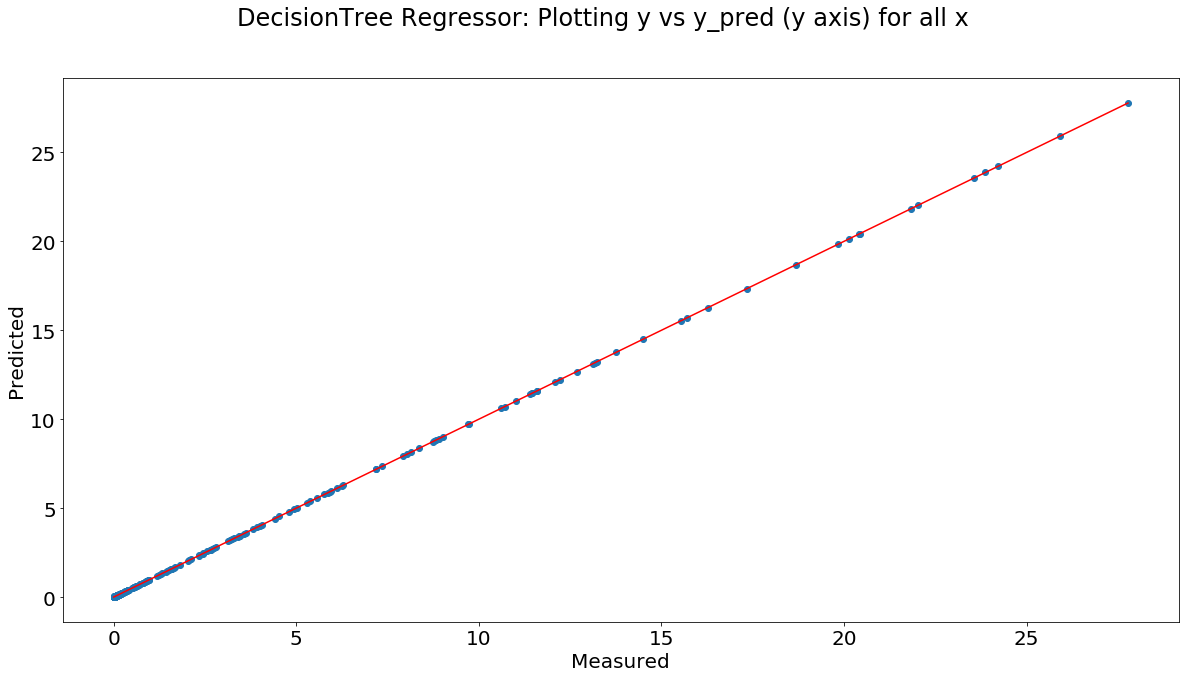

In [256]:
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(20,10))
plt.scatter(y_val,y_pred)
plt.suptitle('DecisionTree Regressor: Plotting y vs y_pred (y axis) for all x')
plt.plot(np.unique(y_val), np.poly1d(np.polyfit(y_val, y_pred, 1))(np.unique(y_val)),'red')
print(str(np.polyfit(y_val, y_pred, 1)[0])+'x + '+ str(np.polyfit(y_val, y_pred, 1)[1])+' = y')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

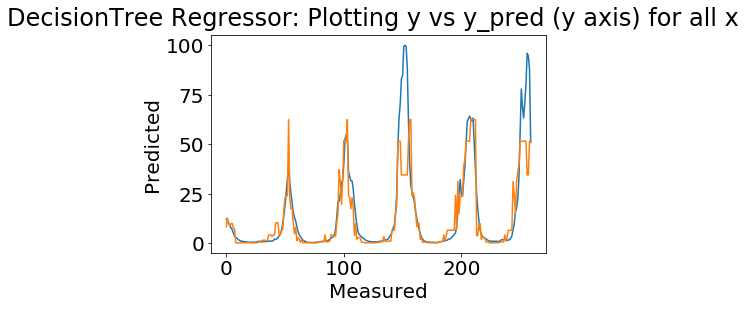

In [218]:
fig, ax = plt.subplots()
plt.plot(np.arange(len(y_test)),y_test)
plt.plot(np.arange(len(y_test)),y_pred)
plt.suptitle('DecisionTree Regressor: Plotting y vs y_pred (y axis) for all x')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

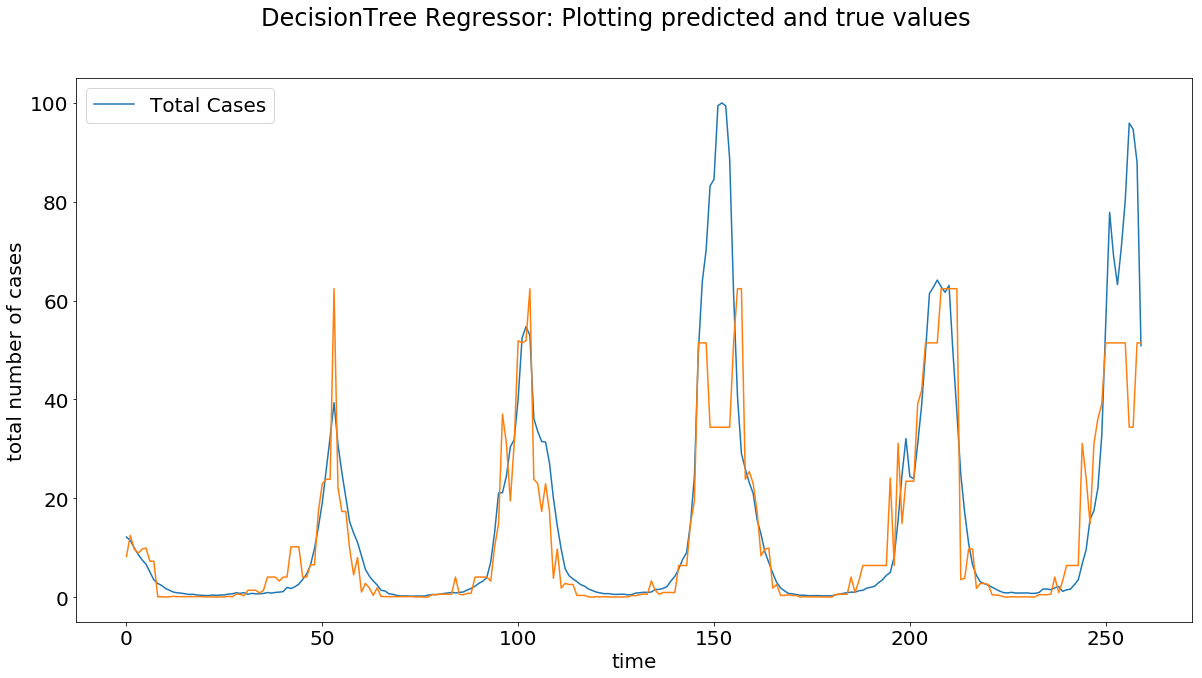

In [219]:
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(20,10))
plt.plot(np.arange(len(y_test)),y_test)
plt.plot(np.arange(len(y_test)),y_pred)
plt.suptitle('DecisionTree Regressor: Plotting predicted and true values')
plt.xlabel('time')
plt.ylabel('total number of cases')
plt.legend()
plt.show()

# Random Forest Regressor

In [220]:
from sklearn.ensemble import RandomForestRegressor

In [231]:
err_dat = pd.DataFrame()
loop_it=100
for i in range(loop_it):
    regr = RandomForestRegressor(max_depth=i+1)
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_val)
    err = rmse(y_val,y_pred)
    err_dat=err_dat.append([err])
err_dat=err_dat.reset_index()
err_dat=err_dat.drop(columns='index')
minval = err_dat.min()
max_dep=err_dat[err_dat[0]==minval[0]]
max_dep=max_dep.reset_index()
max_dep=max_dep['index'][0]

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

In [251]:
regr = RandomForestRegressor(max_depth=max_dep)
regr.fit(x_train,y_train)
y_pred = regr.predict(x_val)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.000234623597258x + 0.16142435457599114 = y


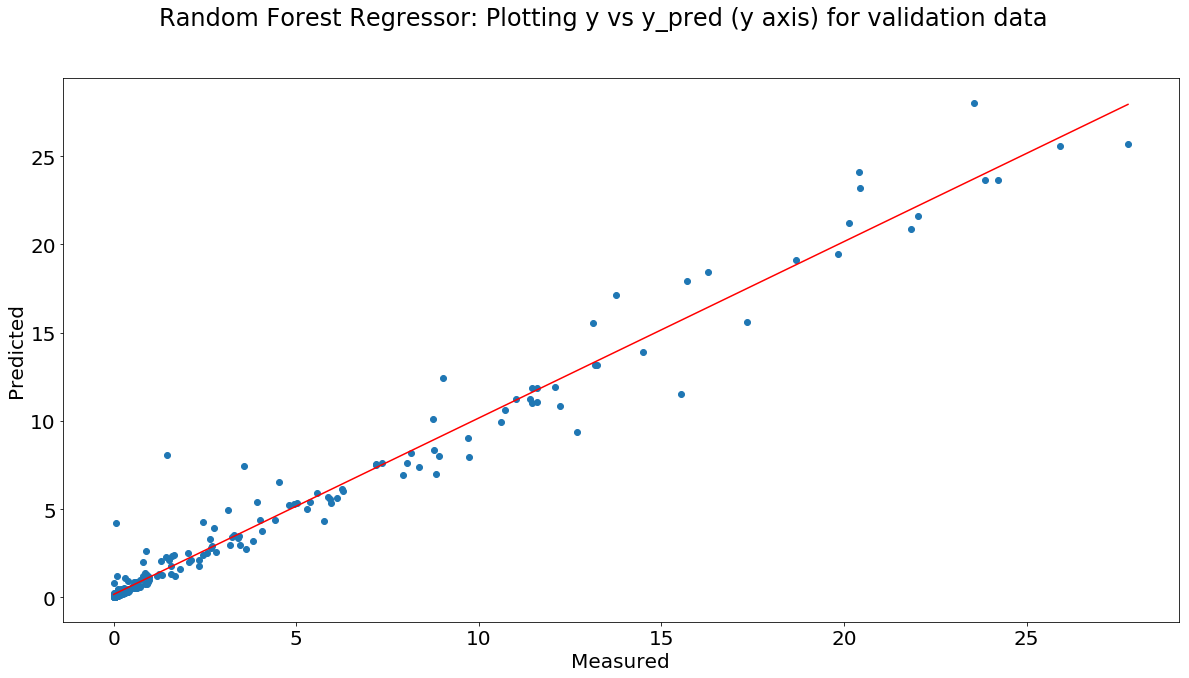

In [254]:
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(20,10))
plt.scatter(y_val,y_pred)
plt.suptitle('Random Forest Regressor: Plotting y vs y_pred (y axis) for validation data')
plt.plot(np.unique(y_val), np.poly1d(np.polyfit(y_val, y_pred, 1))(np.unique(y_val)),'red')
print(str(np.polyfit(y_val, y_pred, 1)[0])+'x + '+ str(np.polyfit(y_val, y_pred, 1)[1])+' = y')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

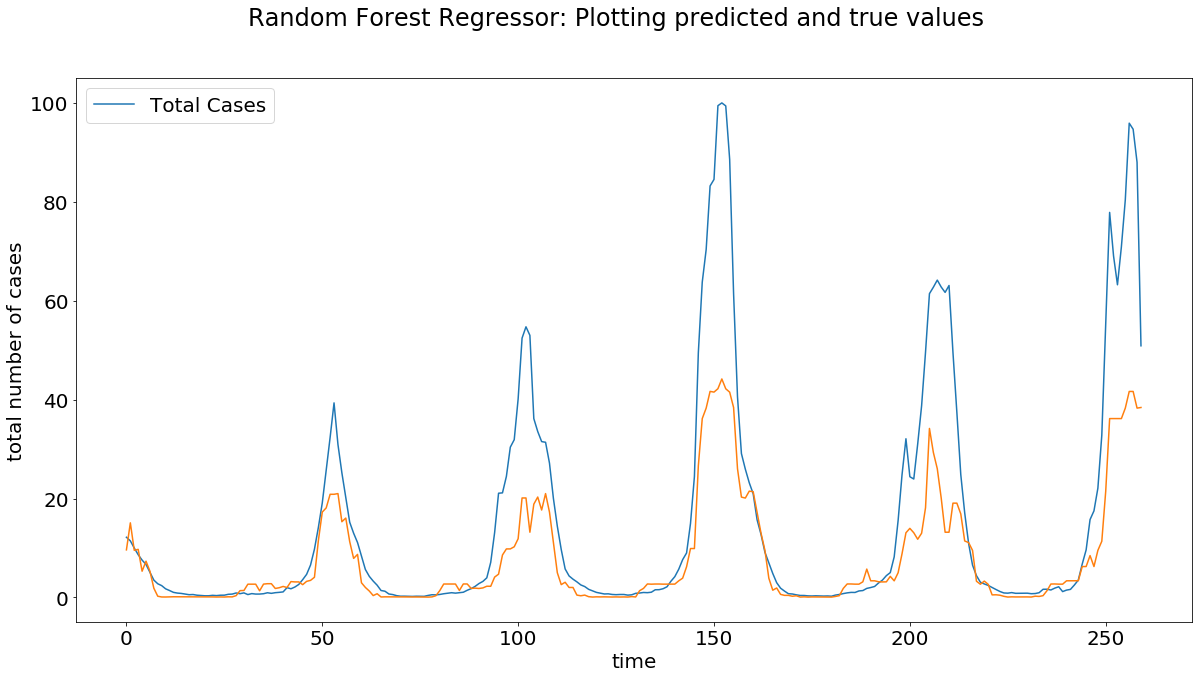

In [93]:
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(20,10))
plt.plot(np.arange(len(y_test)),y_test)
plt.plot(np.arange(len(y_test)),y_pred)
plt.legend()
plt.suptitle('Random Forest Regressor: Plotting predicted and true values')
plt.xlabel('time')
plt.ylabel('total number of cases')
plt.show()

# Neural Network

In [239]:
from keras import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
import keras.backend as K

In [240]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(y.shape)
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2

In [244]:
num_inputs = x.shape[1]
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=1, input_dim=num_inputs,kernel_initializer='normal',activation='sigmoid'))
    regressor.add(Dense(units=1, input_dim=2,kernel_initializer='normal',activation='relu'))
    regressor.add(Dense(units=1, input_dim=7,kernel_initializer='normal',activation='tanh'))
    regressor.add(Dense(units=1, input_dim=10,kernel_initializer='normal',activation='selu'))
    regressor.add(Dense(units=1, input_dim=4,kernel_initializer='normal',activation='softplus'))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy',krmse])
    return regressor

In [245]:
regressor = KerasRegressor(build_fn=build_regressor, batch_size=7,epochs=10)
results=regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_val)

Epoch 1/10
520/520 [==============================] - 3s 6ms/step - loss: 105.6369 - mean_absolute_error: 5.0086 - acc: 0.0000e+00 - krmse: 5.0086
Epoch 2/10
520/520 [==============================] - 0s 465us/step - loss: 105.2549 - mean_absolute_error: 5.0042 - acc: 0.0000e+00 - krmse: 5.0042
Epoch 3/10
520/520 [==============================] - 0s 453us/step - loss: 104.6356 - mean_absolute_error: 4.9932 - acc: 0.0000e+00 - krmse: 4.9932
Epoch 4/10
520/520 [==============================] - 0s 470us/step - loss: 103.6385 - mean_absolute_error: 4.9882 - acc: 0.0000e+00 - krmse: 4.9882
Epoch 5/10
520/520 [==============================] - 0s 584us/step - loss: 102.2199 - mean_absolute_error: 4.9857 - acc: 0.0000e+00 - krmse: 4.9857
Epoch 6/10
520/520 [==============================] - 0s 479us/step - loss: 100.4035 - mean_absolute_error: 4.9850 - acc: 0.0000e+00 - krmse: 4.9850
Epoch 7/10
520/520 [==============================] - 0s 451us/step - loss: 98.4291 - mean_absolute_error: 5

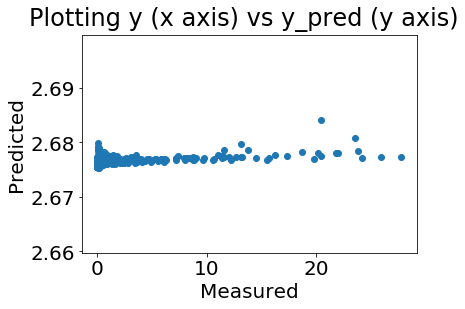

In [246]:
fig, ax = plt.subplots()
# scatter(x['PicVocab_AgeAdj'], y_pred)
ax.scatter(y_val,y_pred)
# ax.scatter(x['ReadEng_AgeAdj'], y_pred)

# ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
# ax.scatter(x['PicVocab_AgeAdj'],y,color='r')
# ax.scatter(x['ReadEng_AgeAdj'],y,color='b')

plt.suptitle('Plotting y (x axis) vs y_pred (y axis)')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

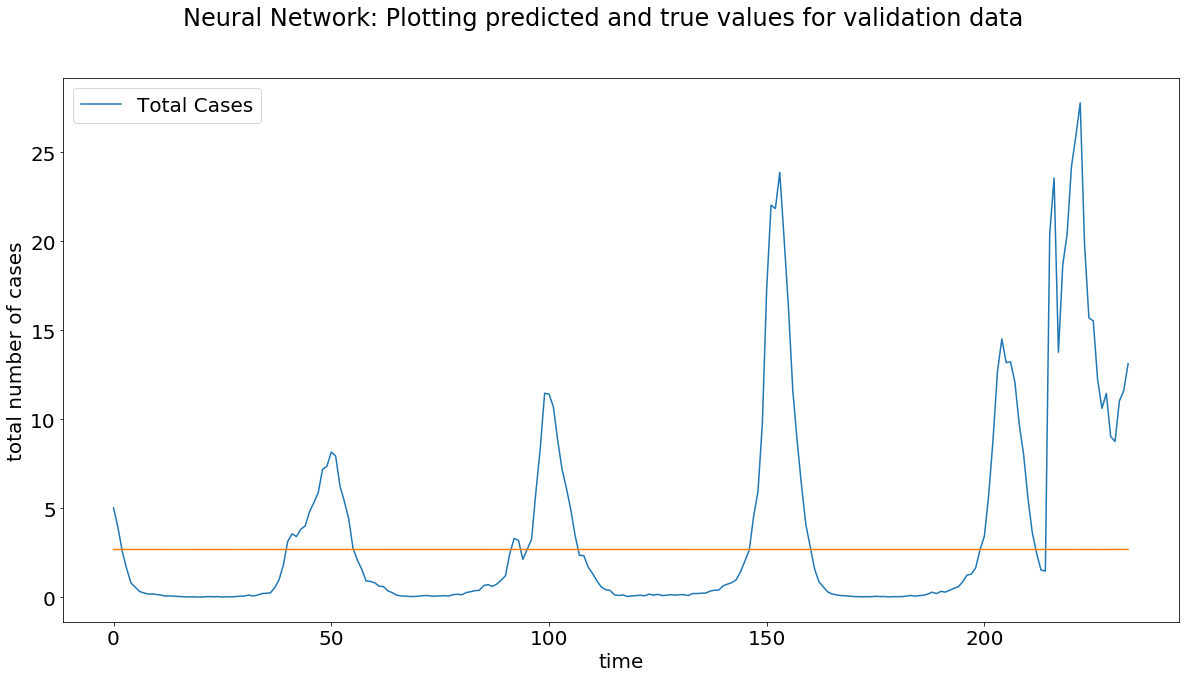

In [250]:
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(20,10))
plt.plot(np.arange(len(y_val)),y_val)
plt.plot(np.arange(len(y_val)),y_pred)
plt.legend()
plt.suptitle('Neural Network: Plotting predicted and true values for validation data')
plt.xlabel('time')
plt.ylabel('total number of cases')
plt.show()